# Initialization

In [684]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import scipy.sparse as sp
np.random.seed(2)
iter = 2500
n = 200
m = 100
X = np.random.randn(n,m)
beta = np.ones(m)
epsilon = np.random.randn(n)
y = X@beta + epsilon

In [685]:
theta_hat = np.linalg.inv(X.T@X)@X.T@y

In [686]:
def df(A,b,x):
    return (2/n)*(A.T@(A@x) - A.T@b)
def df_j(A,b,x,j):
    return (2/n)*np.dot(A[:,j],(A@x - b))
def step_size(A):
    eigenvalues, eigenvectors = np.linalg.eig(A.T@A)
    return n/(max(eigenvalues))

#Gradient Descent Step Size

In [687]:
error = np.zeros(iter)
theta_k = np.zeros((m,iter))
t = step_size(X)
print(t)
t = 0.35


0.35277670518174525


# Gradient Descent

In [688]:
start_time = time.time()
for i in range(1,iter):
    theta_k[:,i] = theta_k[:,i-1] - t*df(X,y,theta_k[:,i-1])
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.10441470146179199 seconds


# Plotting Gradient Descent

Text(0, 0.5, 'Error')

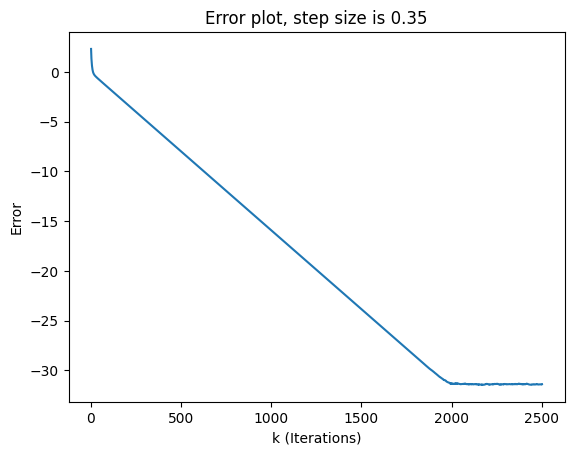

In [689]:
for i in range(iter):
    error[i] = np.log(np.linalg.norm(theta_k[:,i] - theta_hat))
plt.figure()
plt.plot(np.linspace(1,iter+1, iter),error)
plt.title("Error plot, step size is " + str(t))
plt.xlabel("k (Iterations)")
plt.ylabel("Error")

# Coordinate Descent Step Size

In [690]:
iter1 = 200
iter = iter1*m
error = np.zeros(iter)
theta_k = np.zeros((m,iter))
t = [0.25, 0.5, 0.75, 1]

# Coordinate Descent

In [691]:
theta_k_array=[]
for z in range(len(t)):
  start_time = time.time()
  for i in range(0,iter1):
      for j in range(1,m+1):
          if (i)*m + j < iter:
              theta_k[:,(i)*m + j] = theta_k[:,(i)*m + j-1]
              theta_k[:,(i)*m + j][j-1] = theta_k[:,(i)*m + j-1][j-1] - t[z]*(df_j(X,y,theta_k[:,(i*m + j-1)], j-1))
  end_time = time.time()
  elapsed_time = end_time - start_time
  print(f"Elapsed time: {elapsed_time} seconds")
  method = "Cyclic"
  theta_k_array.append(theta_k.copy())


Elapsed time: 1.1841754913330078 seconds
Elapsed time: 0.9791140556335449 seconds
Elapsed time: 1.1561095714569092 seconds
Elapsed time: 1.0303118228912354 seconds


# Plotting Coordinate Descent with Different Step Sizes

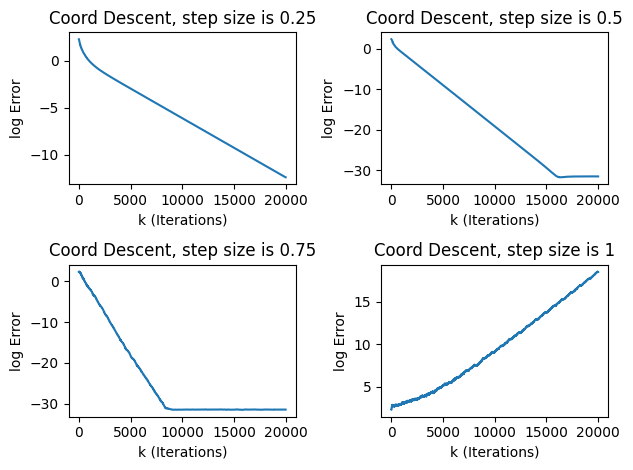

In [692]:
for z in range(len(theta_k_array)):
  theta_k = theta_k_array[z]
  for i in range(iter):
      error[i] = np.log(np.linalg.norm(theta_k[:,i] - theta_hat))
  plt.subplot(2, 2, z+1)
  plt.plot(np.linspace(1,iter+1, iter),error)
  plt.title("Coord Descent, step size is "+ str(t[z]))
  plt.tight_layout()
  plt.xlabel("k (Iterations)")
  plt.ylabel("log Error")

# Gradient and Coordinate Descent

In [693]:
iter1 = 200
iter = iter1*m
error = np.zeros(iter)
theta_k = np.zeros((m,iter))
grad_time = np.zeros(iter)
#t = step_size(X)
t = 0.35
start_time = time.time()
start_time = time.time()
for i in range(1,iter):
    start = time.time()
    theta_k[:,i] = theta_k[:,i-1] - t*df(X,y,theta_k[:,i-1])
    end = time.time()
    grad_time[i] = grad_time[i-1] + end-start
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")
coord_time = np.zeros(iter)
error_coord = np.zeros(iter)
error_coord1 = np.zeros(iter1)
theta_k_coord = np.zeros((m,iter))
t = 0.75
zero = np.zeros((m))
start_time = time.time()
for i in range(0,iter1):
    for j in range(1,m+1):
        if (i)*m + j < iter:
            start = time.time()
            theta_k_coord[:,(i)*m + j] = theta_k_coord[:,(i)*m + j-1]
            theta_k_coord[j-1,(i)*m + j] = theta_k_coord[j-1,(i)*m + j-1] - t*(df_j(X,y,theta_k_coord[:,(i*m + j-1)], j-1))
            end = time.time()
            coord_time[i*m + j] = coord_time[i*m + j-1] + end-start
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.9418478012084961 seconds
Elapsed time: 0.5112838745117188 seconds


#Plotting Gradient and Coordinate Descent over Iterations and Time

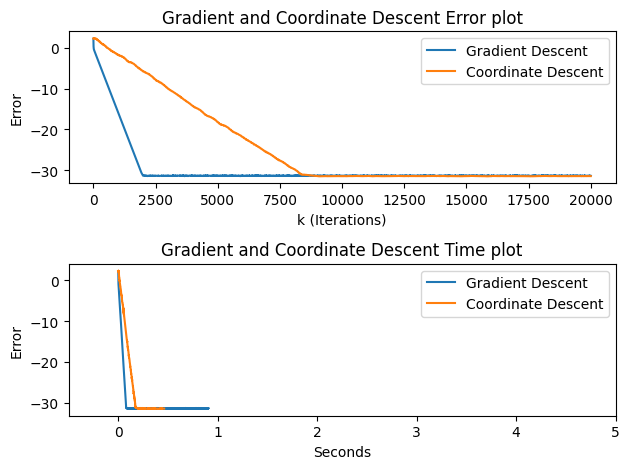

In [694]:
for i in range(iter):
    error[i] = np.log(np.linalg.norm(theta_k[:,i] - theta_hat))
for i in range(iter):
    error_coord[i] = np.log(np.linalg.norm(theta_k_coord[:,i] - theta_hat))
#for i in range(iter1):
#    error_coord1[i] = np.log(np.linalg.norm(theta_k_coord[:,i*m] - theta_hat))
plt.figure()
plt.subplot(2,1,1)
plt.plot(np.linspace(1,iter+1,iter),error)
plt.plot(np.linspace(1,iter+1, iter),error_coord)
plt.title("Gradient and Coordinate Descent Error plot")
plt.xlabel("k (Iterations)")
plt.ylabel("Error")
plt.legend(["Gradient Descent", "Coordinate Descent"])
plt.subplot(2,1,2)
#plt.plot(np.linspace(1,iter1+1,iter1),error)
#plt.plot(np.linspace(1,iter1+1, iter1),error_coord1)
plt.plot(grad_time,error)
plt.plot(coord_time,error_coord)
plt.xlim(-0.5,5)
plt.title("Gradient and Coordinate Descent Time plot")
plt.xlabel("Seconds")
#plt.xlabel("k (Cycles)")
plt.ylabel("Error")
plt.legend(["Gradient Descent", "Coordinate Descent"])
plt.tight_layout()